In [12]:
import os
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Set variabel lingkungan OMP_NUM_THREADS sebelum menjalankan KMeans
os.environ['OMP_NUM_THREADS'] = '2'

# Membaca data dari file CSV
data = pd.read_csv('heart.csv')

# Memilih subset fitur
X = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]

# Normalisasi pada subset fitur yang dipilih
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menggunakan Gaussian Mixture Model (GMM)
n_components = 3  # Jumlah komponen/clusters yang diinginkan
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X_scaled)

# Menambahkan kolom hasil clustering ke dalam dataframe
data['cluster'] = gmm.predict(X_scaled)

# Menampilkan hasil clustering
print(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'cluster']])


      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope        ca  thal  cluster  
0      3.0  0

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [13]:
data_baru = pd.DataFrame({'age': [2.3], 'sex': [1.0], 'cp': [0.0], 'trestbps': [33], 'chol': [3.3],
                          'fbs': [0.0], 'restecg': [1.0], 'thalach': [4.2], 'exang': [0.0],
                          'oldpeak': [2.3], 'slope': [0.0], 'ca': [0], 'thal': [0]})

# Standardize the new data
data_baru_scaled = scaler.transform(data_baru)

# Make predictions for the new data
prediksi_gmm = gmm.predict(data_baru_scaled)

# Display the prediction results
print("Hasil prediksi GMM:", prediksi_gmm)

Hasil prediksi GMM: [1]


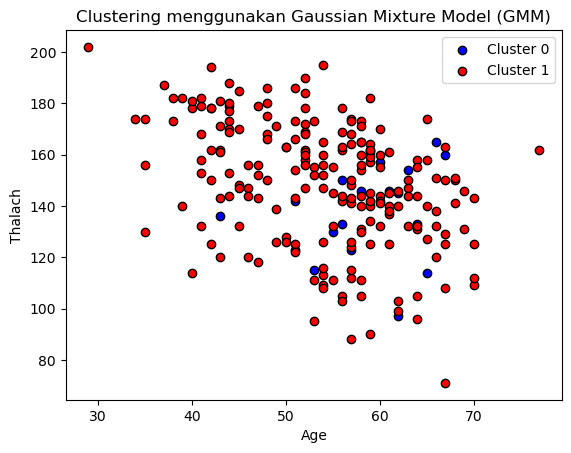

In [15]:
import matplotlib.pyplot as plt

# Menggunakan gmm.predict untuk mendapatkan label klaster dari data yang telah dilatih
labels_gmm = gmm.predict(X_scaled)

# Menambahkan kolom 'cluster' ke data asli
data['cluster_gmm'] = labels_gmm
labels_gmm = data['cluster_gmm'].replace({0: 'Cluster 0', 1: 'Cluster 1'})

cluster_0_gmm = data[data['cluster_gmm'] == 0]
cluster_1_gmm = data[data['cluster_gmm'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0_gmm['age'], cluster_0_gmm['thalach'], label='Cluster 0', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_gmm['age'], cluster_1_gmm['thalach'], label='Cluster 1', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan Gaussian Mixture Model (GMM)')
plt.xlabel('Age')
plt.ylabel('Thalach')

plt.legend()
plt.show()


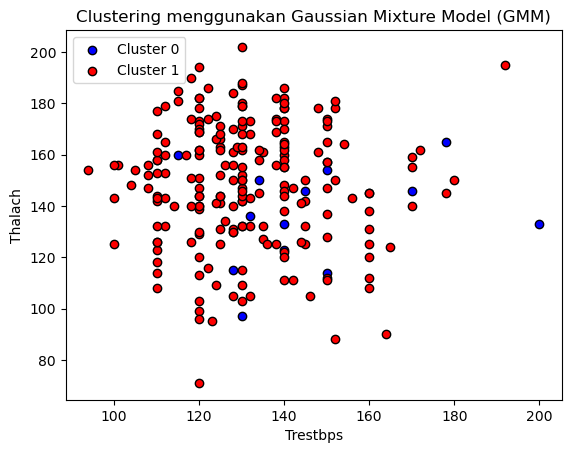

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan gmm.predict untuk mendapatkan label klaster dari data yang telah dilatih
labels_gmm = gmm.predict(X_scaled)

# Menambahkan kolom 'cluster_gmm' ke data asli
data['cluster_gmm'] = labels_gmm
labels_gmm = data['cluster_gmm'].replace({0: 'Cluster 0', 1: 'Cluster 1'})

cluster_0_gmm = data[data['cluster_gmm'] == 0]
cluster_1_gmm = data[data['cluster_gmm'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0_gmm['trestbps'], cluster_0_gmm['thalach'], label='Cluster 0', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_gmm['trestbps'], cluster_1_gmm['thalach'], label='Cluster 1', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan Gaussian Mixture Model (GMM)')
plt.xlabel('Trestbps')
plt.ylabel('Thalach')

plt.legend()


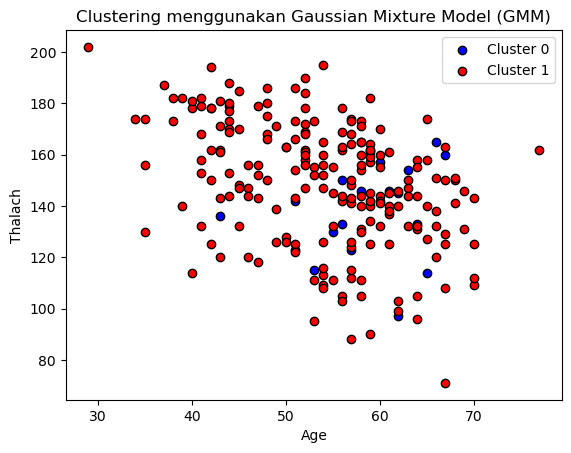

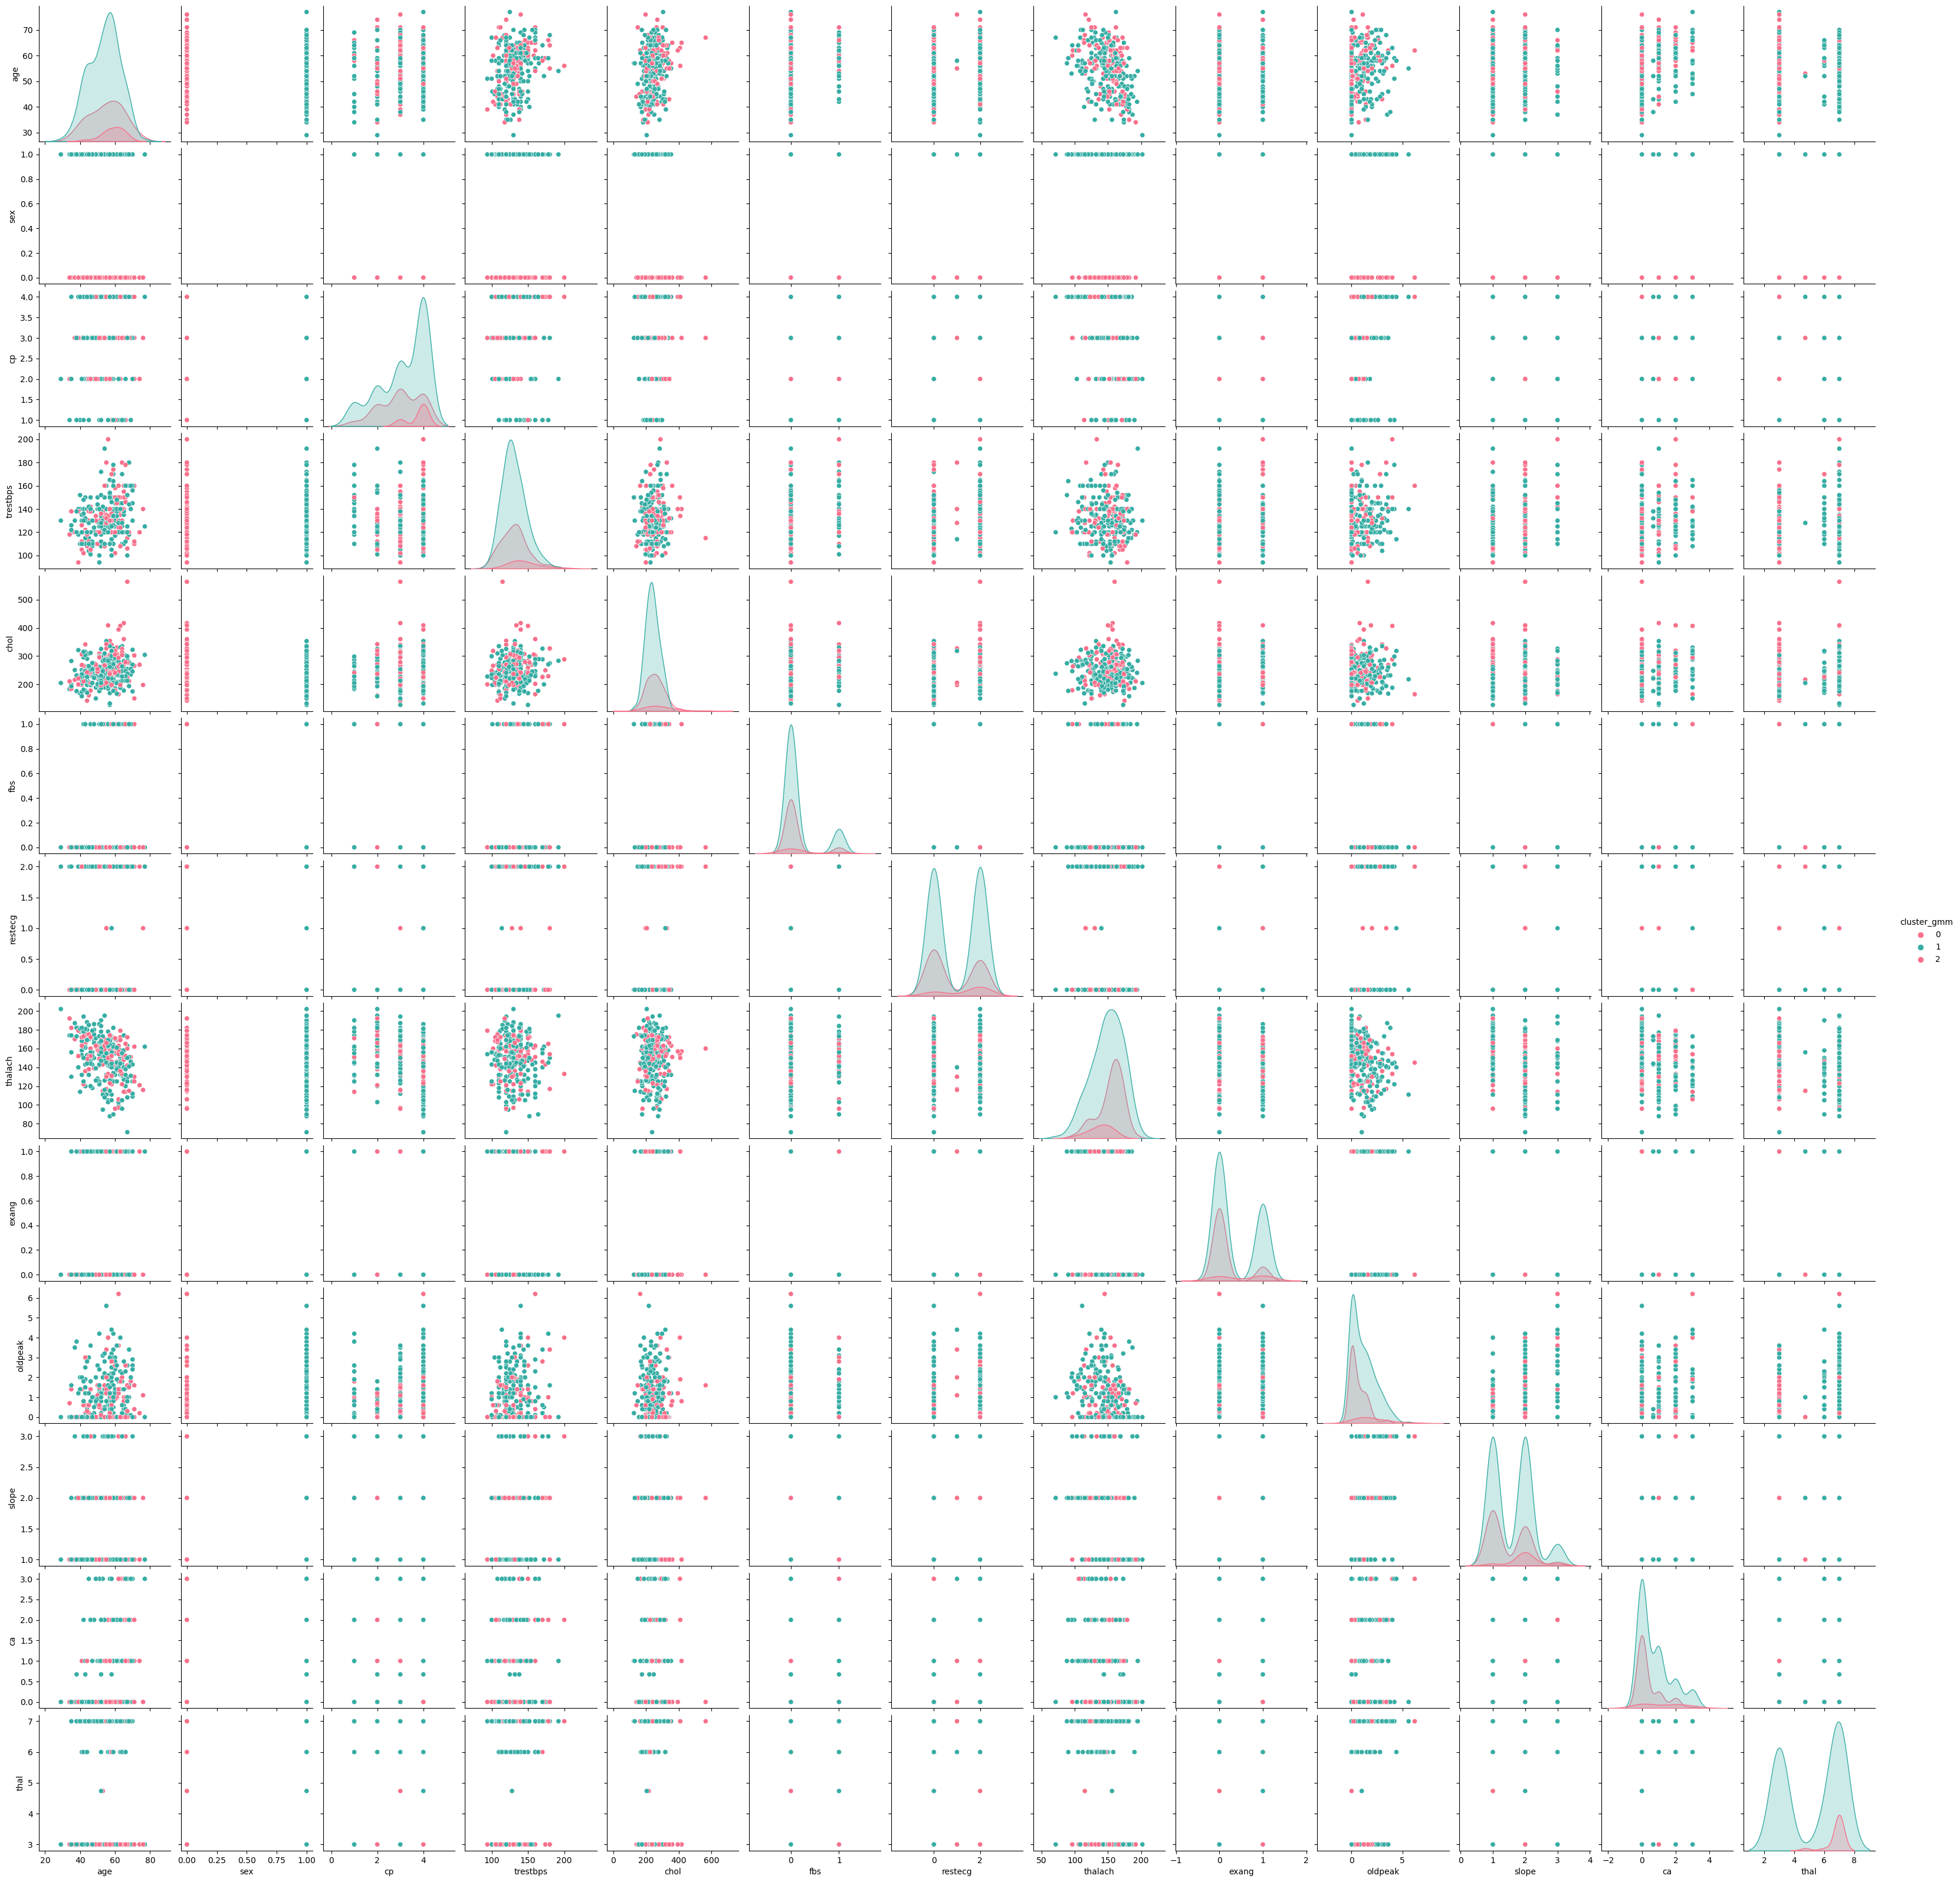

In [19]:
import seaborn as sns

# Menggunakan gmm.predict untuk mendapatkan label klaster dari data yang telah dilatih
labels_gmm = gmm.predict(X_scaled)

# Menambahkan kolom 'cluster_gmm' ke data asli
data['cluster_gmm'] = labels_gmm
labels_gmm = data['cluster_gmm'].replace({0: 'Cluster 0', 1: 'Cluster 1'})

cluster_0_gmm = data[data['cluster_gmm'] == 0]
cluster_1_gmm = data[data['cluster_gmm'] == 1]

# Membuat scatter plot untuk masing-masing klaster dengan label yang telah didefinisikan sebelumnya
plt.scatter(cluster_0_gmm['age'], cluster_0_gmm['thalach'], label='Cluster 0', c='blue', marker='o', edgecolors='black')
plt.scatter(cluster_1_gmm['age'], cluster_1_gmm['thalach'], label='Cluster 1', c='red', marker='o', edgecolors='black')

plt.title('Clustering menggunakan Gaussian Mixture Model (GMM)')
plt.xlabel('Age')
plt.ylabel('Thalach')

plt.legend()

# Menampilkan pair plot untuk visualisasi fitur-fitur dalam satu plot
sns.pairplot(data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'cluster_gmm']], hue='cluster_gmm', palette='husl')
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

labels_gmm = labels_gmm.astype(str)

label_encoder = LabelEncoder()
labels_gmm = label_encoder.fit_transform(labels_gmm)

silhouette_avg_gmm = silhouette_score(X_scaled, labels_gmm)

print(f"Silhouette Score GMM: {silhouette_avg_gmm}")


Silhouette Score GMM: 0.08497316846562589
